<a href="https://colab.research.google.com/github/shizoda/education/blob/main/coin_toss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 大数の法則

In [7]:
###### 準備 #####

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# シードの固定
np.random.seed(42)

def coin_toss_simulation(num_tosses):
    # 0が表、1が裏とする
    tosses = np.random.randint(0, 2, size=num_tosses)
    return tosses

def plot_results(results, num_tosses):
    # 表の割合を計算
    heads_ratio = np.cumsum(results == 0) / (np.arange(num_tosses) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, num_tosses + 1), heads_ratio, label='Heads Ratio')
    plt.axhline(y=0.5, color='r', linestyle='--', label='Expected Ratio (0.5)')
    plt.xlabel('Number of Tosses (log scale)')
    plt.ylabel('Ratio of Heads')
    plt.ylim(0, 1)  # 縦軸を0以上1以下に固定
    plt.title(f'Coin Toss Simulation with {num_tosses} Tosses')
    plt.xscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


def print_head_tail_counts(results, checkpoints):
    data = {'Checkpoint': [], 'Heads': [], 'Tails': []}
    for checkpoint in checkpoints:
        heads_count = np.sum(results[:checkpoint] == 0)
        tails_count = checkpoint - heads_count
        data['Checkpoint'].append(checkpoint)
        data['Heads'].append(heads_count)
        data['Tails'].append(tails_count)

    df = pd.DataFrame(data)
    display(df)

In [8]:
# 10000回のコイントス
num_tosses_10000 = 10000
results_10000 = coin_toss_simulation(num_tosses_10000)

In [11]:
# 最初の5回、10回、100回、1000, 10000 回について表と裏の数を出力
checkpoints = [1, 5, 10, 100, 1000, 10000]
print_head_tail_counts(results_10000, checkpoints)

,Checkpoint,Heads,Tails
0,1,1,0
1,5,4,1
2,10,7,3
3,100,44,56
4,1000,490,510
5,10000,5013,4987


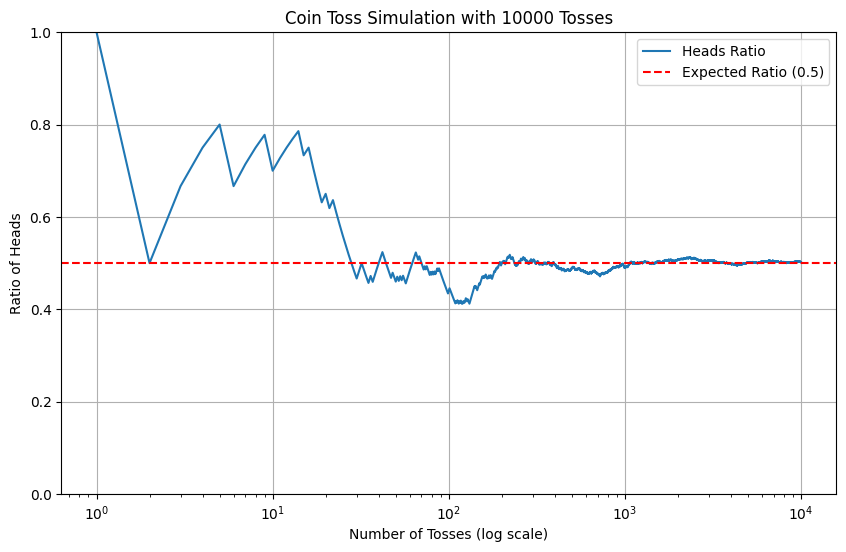

In [12]:
# 結果のプロット
plot_results(results_10000, num_tosses_10000)

## 最尤推定

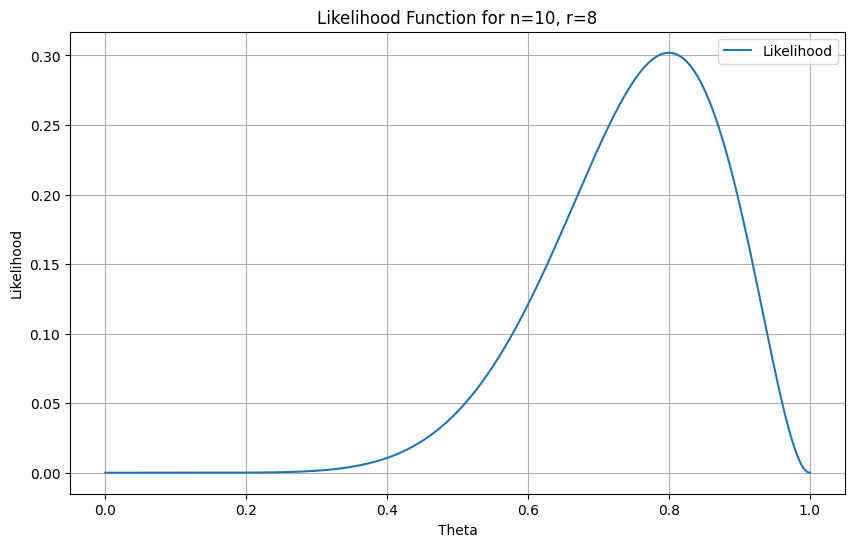

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# 尤度関数の定義
def likelihood(theta, n, r):
    return comb(n, r) * theta**r * (1-theta)**(n-r)

# パラメータの設定
n = 10  # コイントスの回数
r = 8   # 表の回数

# Θの範囲を設定
theta_values = np.linspace(0, 1, 500)
likelihood_values = [likelihood(theta, n, r) for theta in theta_values]

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(theta_values, likelihood_values, label='Likelihood')
plt.xlabel('Theta')
plt.ylabel('Likelihood')
plt.title(f'Likelihood Function for n={n}, r={r}')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
mle_theta = theta_values[np.argmax(likelihood_values)]
max_likelihood = np.max(likelihood_values)
print(f'■■■： {mle_theta:.3f}')
print(f'▲▲▲： {max_likelihood:.3f}')

■■■： 0.800
▲▲▲： 0.302


## ベイズ推定

### ベータ分布
表が $ \alpha-1$ 回、裏が $\beta-1$ 回出るようなコインの成功確率 $\theta$ を表す確率密度関数

$
\text{Beta}(\alpha, \beta) = \frac{\theta^{\alpha-1} (1-\theta)^{\beta-1}}{B(\alpha, \beta)} $

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta as beta_func, comb

# ベータ関数の定義
def beta_function(alpha, beta):
    return beta_func(alpha, beta)

# ベータ分布の確率密度関数
def beta_pdf(theta, alpha, beta):
    coeff = 1 / beta_function(alpha, beta)
    return coeff * theta**(alpha-1) * (1-theta)**(beta-1)


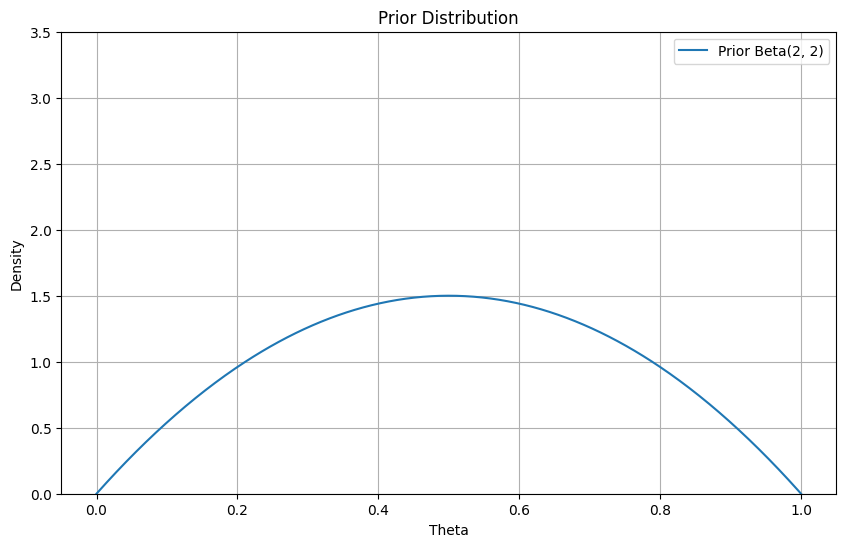

In [49]:
# コイントスの観測データ
n = 10  # コイントスの回数
r = 8   # 表の回数

# 事前分布のパラメータ
alpha_prior = 2
beta_prior = 2

# ベイズの定理を用いて事前分布を計算
prior_values = beta_pdf(theta_values, alpha_prior, beta_prior)

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior_values, label=f'Prior Beta({alpha_prior}, {beta_prior})')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.ylim(0, 3.5)
plt.title('Prior Distribution')
plt.grid(True)
plt.legend()
plt.show()

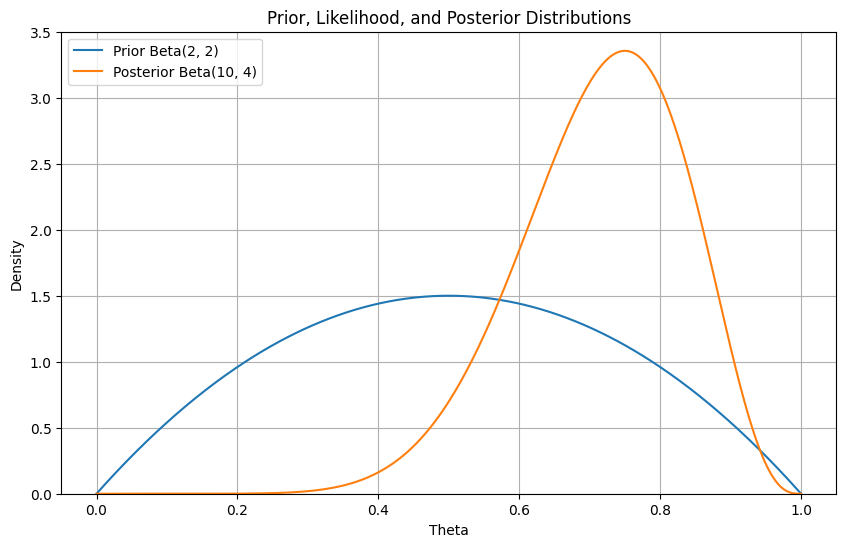

Maximum Likelihood Estimate for theta from Posterior: 0.749


In [50]:
# ベイズの定理を適用して事後分布を計算する関数
def bayes_update(prior_alpha, prior_beta, n, r, theta_values = np.linspace(0, 1, 500) ):

    # 事前分布の計算
    prior = beta_pdf(theta_values, prior_alpha, prior_beta)

    # 尤度の計算
    likelihood = theta_values**r * (1 - theta_values)**(n - r)

    # 周辺尤度（正規化定数）の計算
    marginal_likelihood = np.trapz(likelihood * prior, theta_values)

    # 事後分布の計算
    posterior = (likelihood * prior) / marginal_likelihood

    return theta_values, prior, likelihood, posterior

# コイントスの観測データ
n = 10  # コイントスの回数
r = 8   # 表の回数

# ベイズの定理を用いて事後分布を計算
theta_values, prior_values, likelihood_values, posterior_values = bayes_update(alpha_prior, beta_prior, n, r)

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior_values, label=f'Prior Beta({alpha_prior}, {beta_prior})')
# plt.plot(theta_values, likelihood_values, label='Likelihood')
plt.plot(theta_values, posterior_values, label=f'Posterior Beta({alpha_prior + r}, {beta_prior + (n - r)})')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.ylim(0, 3.5)
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.grid(True)
plt.legend()
plt.show()

# 事後分布の最尤推定値の計算
mle_theta_posterior = theta_values[np.argmax(posterior_values)]
print(f'Maximum Likelihood Estimate for theta from Posterior: {mle_theta_posterior:.3f}')


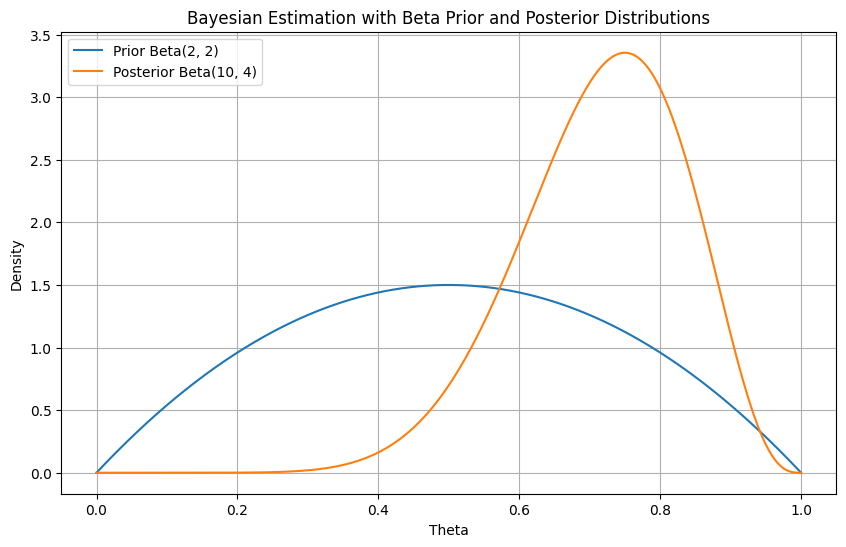

Maximum Likelihood Estimate for theta from Posterior: 0.750


In [51]:
# コイントスの観測データ
n = 10  # コイントスの回数
r = 8   # 表の回数

# 事前分布のパラメータ
alpha_prior = 2
beta_prior = 2

# 事後分布のパラメータ
alpha_posterior = alpha_prior + r
beta_posterior = beta_prior + (n - r)

# Θの範囲を設定
theta_values = np.linspace(0, 1, 500)
prior_values = beta_pdf(theta_values, alpha_prior, beta_prior)
posterior_values = beta_pdf(theta_values, alpha_posterior, beta_posterior)

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior_values, label=f'Prior Beta({alpha_prior}, {beta_prior})')
plt.plot(theta_values, posterior_values, label=f'Posterior Beta({alpha_posterior}, {beta_posterior})')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title(f'Bayesian Estimation with Beta Prior and Posterior Distributions')
plt.grid(True)
plt.legend()
plt.show()

# 事後分布の最尤推定値の計算
mle_theta_posterior = (alpha_posterior - 1) / (alpha_posterior + beta_posterior - 2)
print(f'Maximum Likelihood Estimate for theta from Posterior: {mle_theta_posterior:.3f}')